# Amazing RL Agent

In [1]:
import gymnasium as gym
import torch
import numpy as np
import importlib

# Render screen, set to false if training
RENDER_AGENT = True


In [2]:
# Test pytorch is working

x = torch.rand(size=(1000,))
x = x + 1

# If you have a nvidia gpu with torch installed correctly
# you can move the tensors to the gpu for some extra
# speed, not necessary although.
DEVICE = "cuda:0" if torch.cuda.is_available() else "cpu"
print(f"Using {DEVICE}")
# When creating a new tensor make sure you move it to a
# device using .to(DEVICE), such as:
x = x.to(DEVICE)
# The tensor in x has been moved to the device


Using cpu


In [3]:
# Import agent
import agents

# Reload module as jupyter notebooks wont update to any changes youve made
importlib.reload(
    agents
)
#agent = agents.Agent()

# 24 + 4 as the controller state is included
# agent = agents.TD3(24, 4)

<module 'agents' from 'c:\\Users\\oyvin\\Documents\\Personal\\2   Utdanning\\Master of Computing\\5   Year 4 - Final Year\\CM50270 Reinforcement Learning\\Coursework 2\\ReinforcementLearningCW2\\agents.py'>

In [4]:
# env = gym.make("BipedalWalker-v3", hardcore=False) # , render_mode="human"
# observation, info = env.reset(seed=27)
# steps_per_episode = 200 # T
# for episode in range(1000): # M

#     action = [0, 0, 0, 0]
#     rewards = 0
#     step = 0
#     while(step < steps_per_episode):
#         action = agent.choose_action(
#             env.action_space, observation 
#         )  # this is where you would insert your policy
#         observation, reward, terminated, truncated, info = env.step(action)
#         rewards += reward
        
#         agent.update(observation, reward, terminated, truncated)
#         if terminated or truncated:
#             observation, info = env.reset()
#             action = [0, 0, 0, 0]
#         step += 1
#         #env.render()
#     print(episode, rewards)
#     observation, info = env.reset()
#     #control.reset()
# env.close()


In [5]:
# Import agent
import agents

# Reload module as jupyter notebooks wont update to any changes youve made
importlib.reload(
    agents
)
#agent = agents.Agent()

# 24 + 4 as the controller state is included
# agent = agents.TD3(2, 1)
scores = []

In [6]:

env = gym.make('BipedalWalker-v3', render_mode="human")
observation, info = env.reset(seed=27)

agent = agents.TD3(24, 4, env.action_space)

steps_per_episode = 999 # T
episodes = 10000
for episode in range(episodes): # M   
    rewards = 0
    step = 0
    
    while(step < steps_per_episode):
        action = agent.choose_action(env.action_space, observation)
        observation, reward, terminated, truncated, info = env.step(action.numpy())
        rewards += reward
        
        agent.update(observation, reward, terminated, truncated)

        if terminated or truncated:
            break
        
        step += 1
        env.render()
    
    if episode % 10 == 0:
        print(f"Episode: {episode}, Reward: {rewards}")
    
    scores.append(rewards)
    observation, info = env.reset(seed=27)

env.close()

Episode: 0, Reward: -94.1043304435586
Episode: 10, Reward: -105.5696845893302
Episode: 20, Reward: -105.03471482028198


KeyboardInterrupt: 

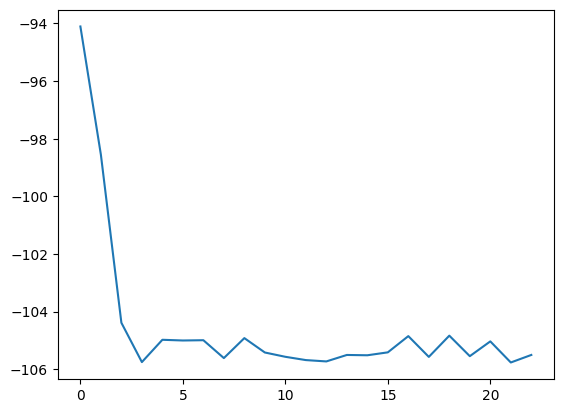

: 

In [7]:
import matplotlib.pyplot as plt
plt.plot([i for i in range(len(scores))], scores)
plt.show()